# Bank churn data pre processing

### 

##### Importing needed Librares

In [1]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("DS1_C8_V3_ND_Sprint3_BankChurn_Data.csv")

##### 

#### Data understanding

In [3]:
data.shape

(10127, 20)

In [4]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Region', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Avg_Utilization_Ratio'],
      dtype='object')

In [5]:
data.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Region                       object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Avg_Utilization_Ratio       float64
dtype: object

#### 

Identify categorical and numerical columns.

In [6]:
def dtypes_col(data):
    categorical = []
    numerical = []
    for i in data.columns:
        if data[i].nunique() >= 20:
            numerical.append(i)
        else:
            categorical.append(i)
            
    return categorical, numerical

categorical, numerical = dtypes_col(data)
print(tabulate({"Categorical":categorical,
                "Numerical": numerical}, headers = ["Categorical", "Numerical"],tablefmt='fancy_grid'))

╒══════════════════════════╤═══════════════════════╕
│ Categorical              │ Numerical             │
╞══════════════════════════╪═══════════════════════╡
│ Attrition_Flag           │ CLIENTNUM             │
├──────────────────────────┼───────────────────────┤
│ Gender                   │ Customer_Age          │
├──────────────────────────┼───────────────────────┤
│ Education_Level          │ Dependent_count       │
├──────────────────────────┼───────────────────────┤
│ Marital_Status           │ Months_on_book        │
├──────────────────────────┼───────────────────────┤
│ Income_Category          │ Credit_Limit          │
├──────────────────────────┼───────────────────────┤
│ Card_Category            │ Total_Revolving_Bal   │
├──────────────────────────┼───────────────────────┤
│ Region                   │ Avg_Open_To_Buy       │
├──────────────────────────┼───────────────────────┤
│ Total_Relationship_Count │ Total_Trans_Amt       │
├──────────────────────────┼──────────────────

###### 

### Display the summary Statistics of Dataset

In [7]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10067.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.382245,2.787400,35.928409,3.812580,2.341167,2.455317,8703.180550,1162.814061,7469.139637,4404.086304,64.858695,0.274894
std,3.690378e+07,8.341393,6.479135,7.986416,1.554408,1.010622,1.106225,9190.058902,814.987335,9090.685324,3397.129254,23.472570,0.275691
min,7.080821e+08,18.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.500000,359.000000,1324.500000,2155.500000,45.000000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4557.000000,1276.000000,3474.000000,3899.000000,67.000000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11127.500000,1784.000000,9859.000000,4741.000000,81.000000,0.503000
max,8.283431e+08,89.000000,143.000000,56.000000,6.000000,6.000000,6.000000,34664.000000,2517.000000,34516.000000,18484.000000,139.000000,0.999000


##### 

### Identify the outliers in Dataset if there is any

In [8]:
numerical

['CLIENTNUM',
 'Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Avg_Utilization_Ratio']

#### Dependent count

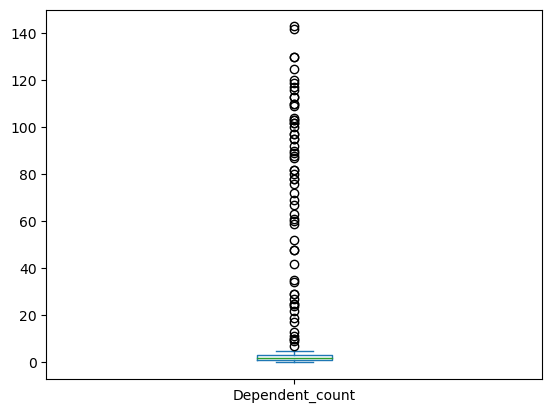

In [9]:
data["Dependent_count"].plot(kind="box",stacked=False)
plt.show()

##### 

#### Credit limit

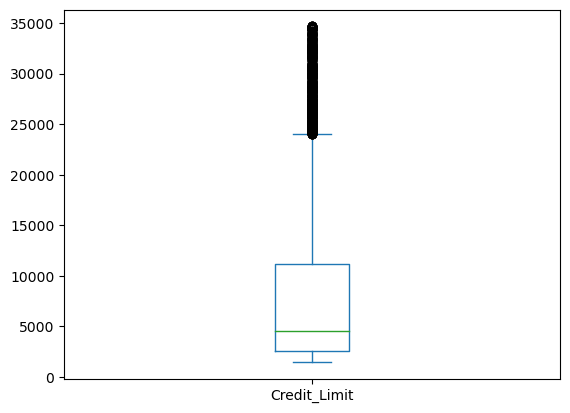

In [10]:
data["Credit_Limit"].plot(kind="box",stacked=False)
plt.show()

##### 

#### Total Revolving Balance

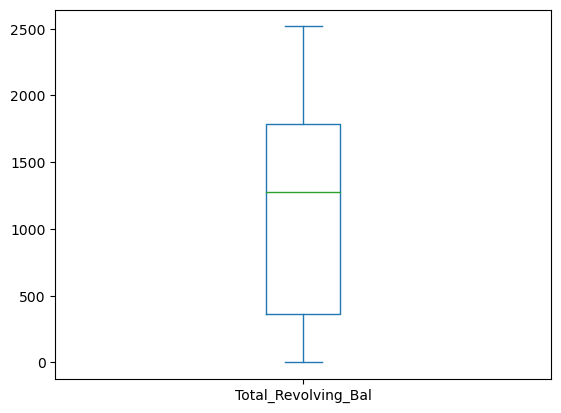

In [11]:
data["Total_Revolving_Bal"].plot(kind="box",stacked=False)
plt.show()

##### 

#### Average open to Buy

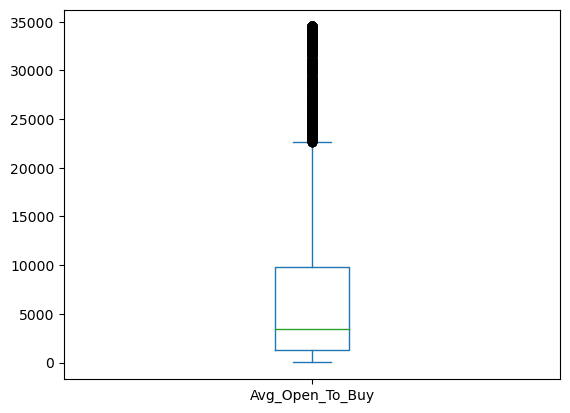

In [12]:
data["Avg_Open_To_Buy"].plot(kind="box",stacked=False)
plt.show()

##### 

#### Total amount Transfer

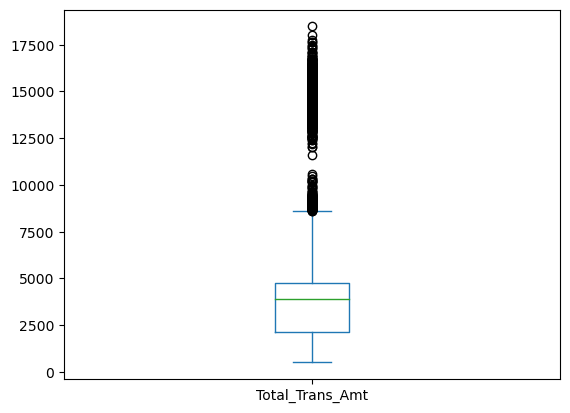

In [13]:
data["Total_Trans_Amt"].plot(kind="box",stacked=False)
plt.show()

##### 

#### INTERPRETATION :
Many outliers are present in columns like Dependent count, Credit limit, Average open to buy, and Total amount transfer. No outliers are observed in the Total revolving amount column.

#### 

### Identify the missing values in dataset Display the count of Missing values

In [14]:
a = data.isnull().sum()
a

CLIENTNUM                     0
Attrition_Flag                0
Customer_Age                  0
Gender                        0
Dependent_count               0
Education_Level               0
Marital_Status                0
Income_Category               0
Card_Category               132
Region                        0
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon         0
Credit_Limit                 60
Total_Revolving_Bal           0
Avg_Open_To_Buy               0
Total_Trans_Amt               0
Total_Trans_Ct                0
Avg_Utilization_Ratio         0
dtype: int64

#### 

#### Perform the imputation using whichever method suits most logically for the given columns in dataset.

In [15]:
a[a>0]

Card_Category    132
Credit_Limit      60
dtype: int64

In [16]:
data.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Region                       object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Avg_Utilization_Ratio       float64
dtype: object

#### 

Card category is an categorical column so imputing missing values with its mode.

In [17]:
data["Card_Category"].fillna(data["Card_Category"].mode()[0], inplace = True)

Credit limit is a numerical column so imputing missing values with its mean.

In [18]:
data["Credit_Limit"].fillna(data["Credit_Limit"].mean(), inplace = True)

###### 

## Exporting cleaned data to csv file.

In [19]:
data.to_csv("Bank churn data Tableau Capston.csv")

In [20]:
import os
os.getcwd()

'C:\\Users\\SHUBH\\Downloads'